[ 23.48733017  23.69051259  23.88756568 ... -26.52412736 -34.51222622
 -43.03597498]


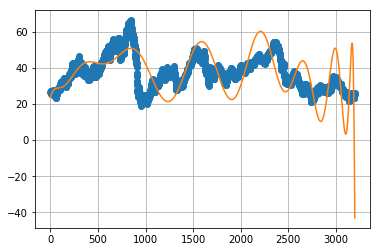

In [51]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib import mlab
import pandas as pd 
fid=open('data_var02.txt','r')
lines=fid.readlines()
fid.close()
fid = pd.read_csv("data_var02.txt")
y = [float(lines[i].split(',')[1]) for i in range(1, len(lines))]
x = [i for i in range(len(y))]
def getC(power,x):
    c=np.zeros((2*power + 1), dtype=float)
    for k in range(2 * power + 1):
            for i in range(3201):
                c[k] += x[i] ** k
            
    return c
def getB(power, x, y):
    b = np.zeros((power + 1), dtype = float)
    
    for k in range(power + 1):
        for i in range(3201):
            b[k] += y[i] * x[i] ** k
            
    return b 
def getCArr(power, c):
    cArr = np.zeros((power + 1, power + 1), dtype = float)
    
    for k in range(power + 1):
        j = k
        for i in range(power + 1):
            cArr[k][i] = c[j]
            j = j + 1
            
    return cArr

def getPolinom(power, x, y):
    polinom = np.zeros((3201), dtype = float)
    
    c = getC(power, x)
    b = getB(power, x, y)
    cArr = getCArr(power, c)
    res = np.linalg.solve(cArr, b)

    for i in range(3201):
        for j in range(power + 1):
            polinom[i] += res[j] * x[i] ** j
            
    return polinom    
polinom = getPolinom(30, x,y)
print (polinom)
fig = plt.figure()
axes = fig.add_subplot(111)
axes.grid()
axes.plot(x,y , '-o', x, polinom)
plt.show()